In [47]:
import json
import matplotlib.pyplot as plt

In [48]:
# Load json file
with open("../logs/val_metrics_list.json", 'r') as f:
    raw_lorentz = json.load(f)
with open("../../baselines/LightGCN-PyTorch/logs/val_metrics_LGCN.json", 'r') as f:
    raw_lightgcn = json.load(f)
with open("../../baselines/NGCF/NGCF/val_ngcf.json", 'r') as f:
    raw_ngcf = json.load(f)
with open("../../baselines/hgcf/log-files/val_metrics_hgcf.json", 'r') as f:
    raw_hgcf = json.load(f)
print("-"*40)
print("Data for LorentzGCN")
print(raw_lorentz[:3])
print("-"*40)
print("Data for LightGCN")
print(raw_lightgcn[:3])
print("-"*40)
print("Data for HGCF")
print(raw_hgcf[:3])
print("-"*40)
print("Data for NGCF")
print(list(raw_ngcf.keys())[:2])

----------------------------------------
Data for LorentzGCN
[{'valid Recall@50': 0.04642960770659239, 'valid NDCG@50': 0.015960868545906223}, {'valid Recall@50': 0.05802213904363979, 'valid NDCG@50': 0.020513308036229607}, {'valid Recall@50': 0.06403203342618391, 'valid NDCG@50': 0.02239864284590005}]
----------------------------------------
Data for LightGCN
[{'precision': [4.1782729805013955e-05], 'recall': [0.0014108925255338902], 'ndcg': [0.0004209341158648933]}, {'precision': [0.0015755571030640664], 'recall': [0.0464121982358403], 'ndcg': [0.016093584552952327]}, {'precision': [0.0018454038997214456], 'recall': [0.05458739554317549], 'ndcg': [0.019196206885537564]}]
----------------------------------------
Data for HGCF
[{'recall@50': 0.04539954735376044, 'recall@20': 0.022260184540389968, 'ndcg@50': 0.015295801012655775, 'ndcg@20': 0.010049514001808159}, {'recall@50': 0.059040593082637004, 'recall@20': 0.030016103760445667, 'ndcg@50': 0.020151879604630295, 'ndcg@20': 0.01359376

In [49]:
recall_data, ndcg_data = dict(), dict()

In [62]:
recall_data["LorentzGCN"] = [item["valid Recall@50"] for item in raw_lorentz]
recall_data["LightGCN"] = [item["recall"][0] for item in raw_lightgcn]
recall_data["HGCF"] = [item["recall@50"] for item in raw_hgcf]
recall_data["NGCF"] = [_i[0] for _i in raw_ngcf["recall@50"]]

ndcg_data["LorentzGCN"] = [item["valid NDCG@50"] for item in raw_lorentz]
ndcg_data["LightGCN"] = [item["ndcg"][0] for item in raw_lightgcn]
ndcg_data["HGCF"] = [item["ndcg@50"] for item in raw_hgcf]
ndcg_data["NGCF"] = [_i[0] for _i in raw_ngcf["ndcg@50"]]


recall_data["LightGCN"] = recall_data["LightGCN"][:len(recall_data["LightGCN"])//2]
ndcg_data["LightGCN"] = ndcg_data["LightGCN"][:len(ndcg_data["LightGCN"])//2]
colors = {
    "LorentzGCN": "#ff8884",
    "LightGCN": "#2878b5",
    "HGCF": "#A1A9D0",
    "NGCF": "#32B897"
}

In [63]:
for key in recall_data.keys():
    recall_data[key] = [recall_data[key][i] for i in range(len(recall_data[key])) if i%2 == 0]

for key in ndcg_data.keys():
    ndcg_data[key] = [ndcg_data[key][i] for i in range(len(ndcg_data[key])) if i%2 == 0]

for key in recall_data.keys():
    print(f"length for {key} is {len(recall_data[key])}")

epochs = [i*10 for i in range(50)]

length for LorentzGCN is 50
length for LightGCN is 50
length for HGCF is 50
length for NGCF is 50


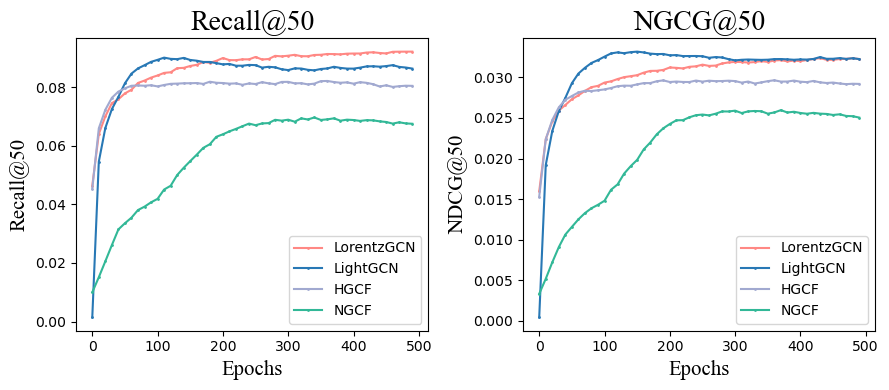

In [64]:
csfont = {'fontname':'Times New Roman'}
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
for key in recall_data.keys():
    plt.plot(epochs, recall_data[key], label=key, marker='.', markersize=2, c=colors[key])

plt.title("Recall@50", **csfont, size=20)
plt.xlabel("Epochs", **csfont, size=15)
plt.ylabel("Recall@50", **csfont, size=15)
plt.legend()

plt.subplot(1, 2, 2)
for key in ndcg_data.keys():
    plt.plot(epochs, ndcg_data[key], label=key, marker='.', markersize=2, c=colors[key])

plt.title("NGCG@50", **csfont, size=20)
plt.xlabel("Epochs", **csfont, size=15)
plt.ylabel("NDCG@50", **csfont, size=15)
plt.legend()
plt.tight_layout()
plt.show()